<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


Plot the histogram for the column `ConvertedComp`.


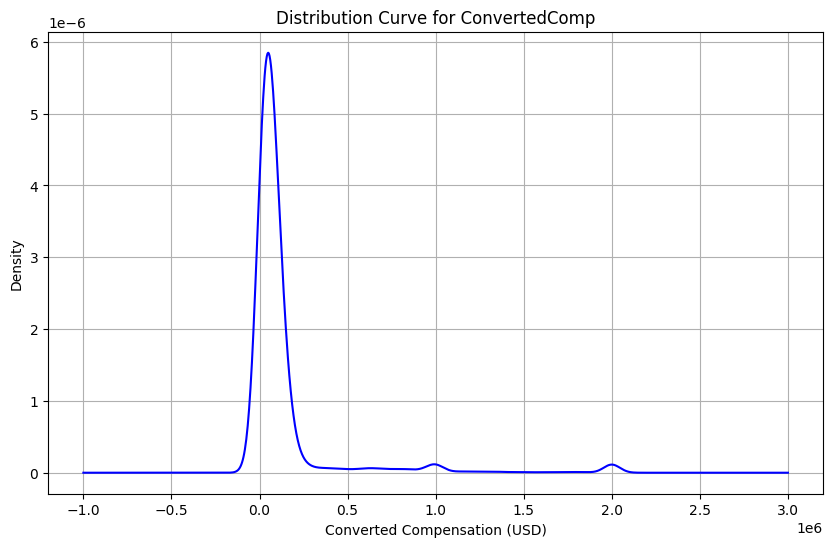

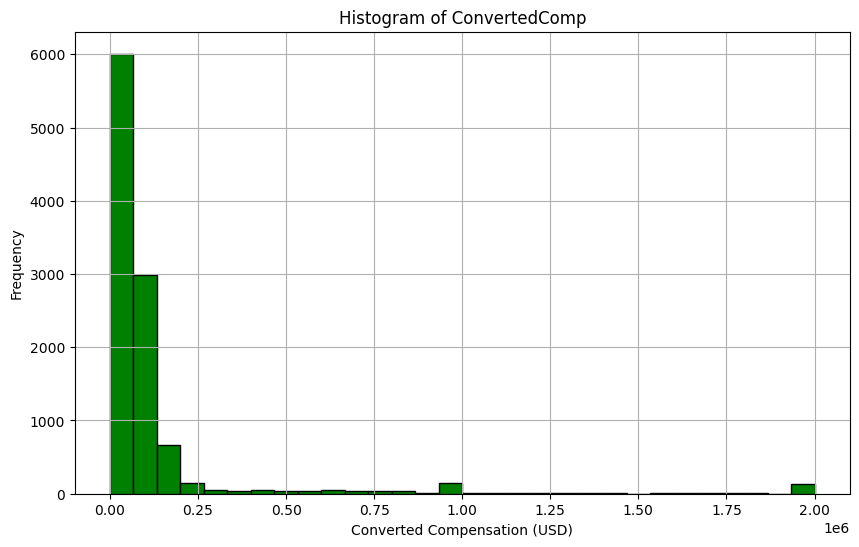

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from pyodide.http import pyfetch
import micropip

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

# URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

# Filename to save the dataset
filename = "m2_survey_data.csv"

# Call the download function asynchronously
await download(file_path, filename)

# Once downloaded, read the dataset into a DataFrame using pandas
df = pd.read_csv(filename)

# Install scipy
await micropip.install("scipy")

# Plot the distribution curve
plt.figure(figsize=(10, 6))
df['ConvertedComp'].plot(kind='density', color='blue')
plt.title('Distribution Curve for ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Plot the histogram
plt.figure(figsize=(10, 6))
df['ConvertedComp'].plot(kind='hist', bins=30, color='green', edgecolor='black')
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




In [ ]:
# your code goes here


What is the median of the column `ConvertedComp`?


In [14]:
# your code goes here
# Calculate the median of the column ConvertedComp
median_converted_comp = df['ConvertedComp'].median()

print("Median of ConvertedComp:", median_converted_comp)

Median of ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [16]:
# your code goes here
# Count the number of responders who identified themselves only as a Man
man_count = df[df['Gender'] == 'Man'].shape[0]

print("Number of responders who identified themselves only as a Man:", man_count)



Number of responders who identified themselves only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [17]:
# your code goes here
# Filter the DataFrame for responders who identified themselves only as a Woman
woman_median_converted_comp = df[df['Gender'] == 'Woman']['ConvertedComp'].median()

print("Median ConvertedComp of responders who identified themselves only as a Woman:", woman_median_converted_comp)


Median ConvertedComp of responders who identified themselves only as a Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [18]:
# your code goes here
# Calculate the five-number summary for the column Age
age_summary = df['Age'].describe()

print("Five-number summary for the column Age:")
print("Minimum:", age_summary['min'])
print("First Quartile (Q1):", age_summary['25%'])
print("Median:", age_summary['50%'])
print("Third Quartile (Q3):", age_summary['75%'])
print("Maximum:", age_summary['max'])

Five-number summary for the column Age:
Minimum: 16.0
First Quartile (Q1): 25.0
Median: 29.0
Third Quartile (Q3): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


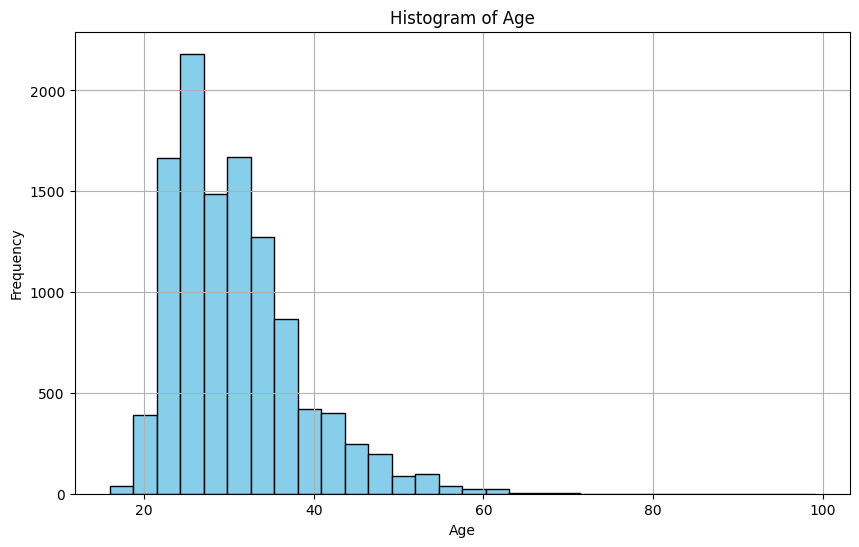

In [19]:
# your code goes here
import matplotlib.pyplot as plt

# Plot histogram of the column Age
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


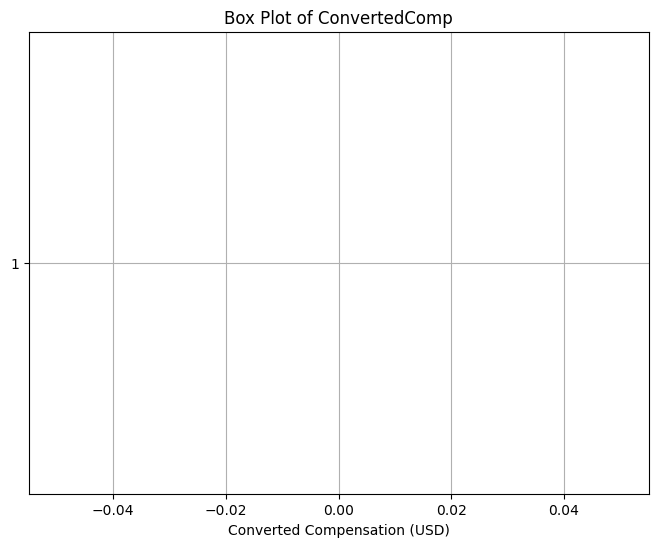

In [20]:
# your code goes here
import matplotlib.pyplot as plt

# Create a box plot of the column ConvertedComp
plt.figure(figsize=(8, 6))
plt.boxplot(df['ConvertedComp'], vert=False)
plt.title('Box Plot of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.grid(True)
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [21]:
# your code goes here
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

print("Interquartile Range (IQR) for the column ConvertedComp:", IQR)


Interquartile Range (IQR) for the column ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [22]:
# your code goes here
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the upper and lower bounds
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

print("Upper Bound for outliers:", upper_bound)
print("Lower Bound for outliers:", lower_bound)


Upper Bound for outliers: 209698.0
Lower Bound for outliers: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [23]:
# your code goes here
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the upper and lower bounds
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

# Identify outliers
outliers = df[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print("Number of outliers in the ConvertedComp column:", num_outliers)


Number of outliers in the ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [24]:
# your code goes here
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the upper and lower bounds
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

# Filter the DataFrame to exclude outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the first few rows of the new DataFrame without outliers
print(df_no_outliers.head())



   Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   
5          19  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
4  Less than once a month but more than once per ...   
5                                              Never   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
4  The qua

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [26]:
# your code goes here
# Find the correlation between Age and all other numerical columns
age_correlation = df.corr()['Age']

print("Correlation between Age and all other numerical columns:")
print(age_correlation)



<ipython-input-26-619ccc9a27d9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  age_correlation = df.corr()['Age']


Correlation between Age and all other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
